<a href="https://colab.research.google.com/github/Tushar1337/Titanic---Machine-Learning-from-Disaster/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
titanic_train=pd.read_csv("train.csv")
titanic_test=pd.read_csv("test.csv")

In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_train["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


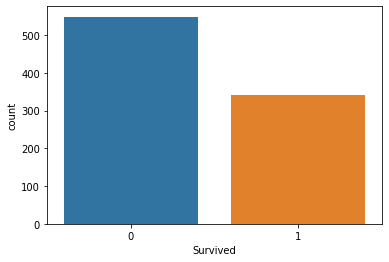

In [8]:
sns.countplot(titanic_train["Survived"])

In [9]:
titanic_train.groupby(['Sex'])["Survived"].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [10]:
titanic_train.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


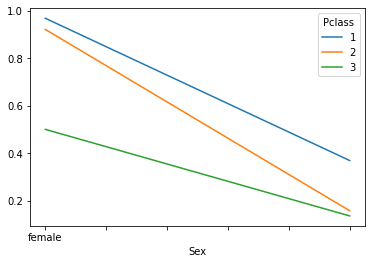

In [11]:
titanic_train.pivot_table('Survived',index='Sex',columns='Pclass').plot()

In [12]:
age=pd.cut(titanic_train['Age'],[1,18,80])

In [13]:
titanic_train.pivot_table('Survived',index=['Sex',age],columns='Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (1, 18]   0.909091  1.000000  0.461538
       (18, 80]  0.972973  0.900000  0.423729
male   (1, 18]   0.750000  0.400000  0.191489
       (18, 80]  0.375000  0.071429  0.133663

In [14]:
titanic_train.isna().sum()
titanic_train=titanic_train.dropna(subset=['Embarked', 'Age'])

In [21]:
titanic_train=titanic_train.drop(['Ticket', 'Name', 'Cabin'],axis=1)
titanic_train=titanic_train.drop(['PassengerId'],axis=1)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


In [16]:
lencoder = LabelEncoder()

In [17]:
titanic_train['Sex']=lencoder.fit_transform(titanic_train['Sex'].values)
titanic_train['Embarked'] = lencoder.fit_transform(titanic_train['Embarked'].values)

In [22]:
titanic_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [30]:
x= titanic_train.iloc[:,1:8].values
y= titanic_train.iloc[:,0].values

In [31]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
sc=StandardScaler()

In [34]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [38]:
def model(x_train,x_test):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  from sklearn.neighbours import KNeighboursClassifier
  knn = KNeighboursClassifier(5, metric = 'minkowski', p = 2)
  knn.fit(x_train,y_train)

  from sklearn.svm import SVC
  svc_lin= SVC(kernal='linear', random_state=0)
  svc_lin.fit(x_train,y_train)

  svc_rbf= SVC(kernal='rbf', random_state=0)
  svc_rbf.fit(x_train,y_train)

  from sklearn.naive_bayes import GaussianNB
  gauss=GaussianNB()
  gauss.fit(x_train,y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion = 'entrophy', random_state=0)
  tree.fit(x_train,y_train)

  from sklearn.ensemble import RandomForestClassfier
  forest = RandomForestClassfier(n_estimators=10, criterion = 'entrophy', random_state=0)
  forest.fit(x_train,y_train)

  print('[1] log accuracy',log.score(x_train,y_train))
  print('[2] knn accuracy',knn.score(x_train,y_train))
  print('[3] svc_lin accuracy',svc_lin.score(x_train,y_train))
  print('[4] svc_rbf accuracy',svc_rbf.score(x_train,y_train))
  print('[5] gauss accuracy',gauss.score(x_train,y_train))
  print('[6] tree accuracy',tree.score(x_train,y_train))
  print('[7] forest accuracy',forest.score(x_train,y_train))
  

  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [ ]:
model(x_train)